In [1]:
##SVMS DELIVER STATE-OF-THE-ART MACHINE LEARNING MODELS
##They are a set of supervised machine learning methods used for both classification and regression

##Given a set of training examples, each marked as belonging to one or the other of two categories, SVM training algorithm
###builds a model that assigns test data points to one category or the other, making it a non-probablistic binary linear classifier.

##SVM model is a representation of the examples as points in n-dimensional space (where n is the number of features)
##These points are mapped so that the exaples of the separate categories are divided by a clear gap that is as wide as possible

##New examples are then mapped onto that same n-dimensional space
###and predictions are made for a category based on which side of the gap the new examples fall

##For linearly separable dataset, we find the hyperplane between the classes of observations which maximises the margin between the classes.  
##For non-linearly separable dataset, we may employ the kernel trick by viewing the data in a higher dimensional feature space.
##By doing this, the data can then be split acros the higher dimensional plane

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_14_SVMs/Breast_Cancer_Diagnostic.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

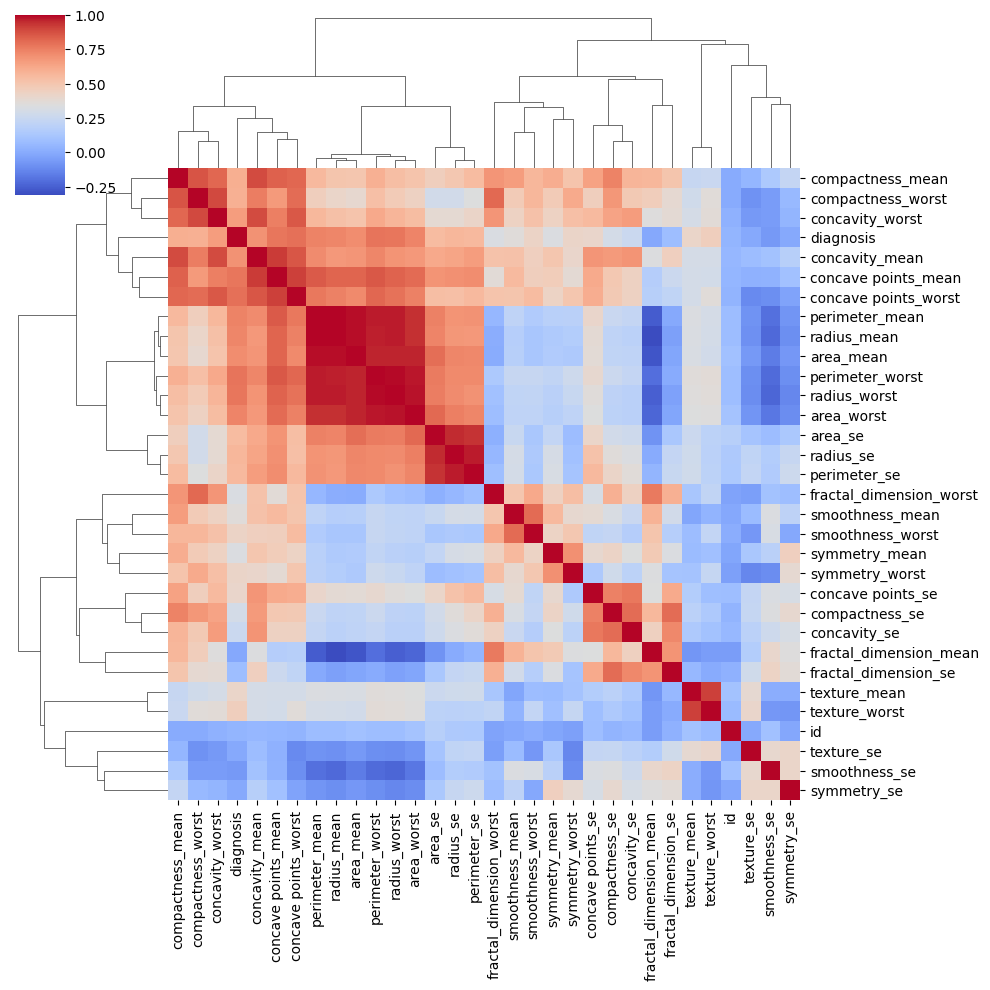

In [6]:
sns.clustermap(df.drop("Unnamed: 32", axis = 1).replace({"B":0, "M":1}).corr(), cmap = 'coolwarm')

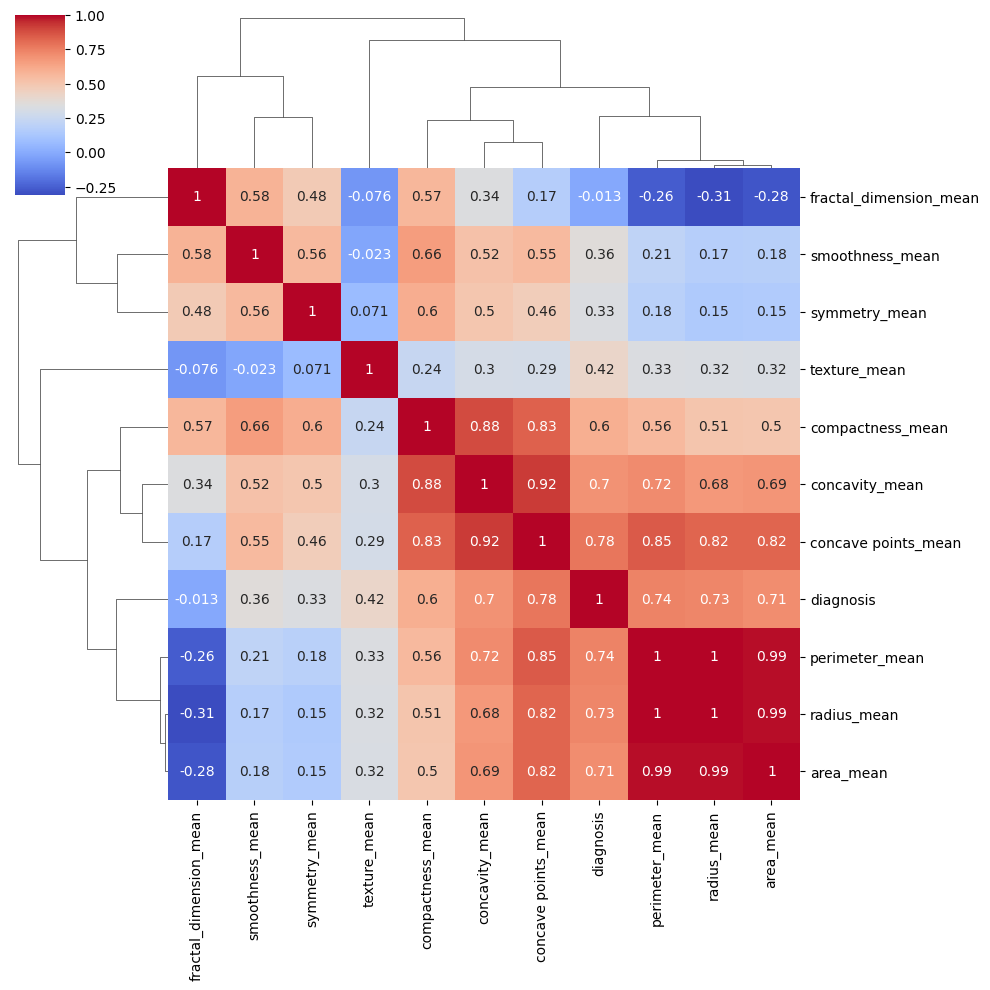

In [7]:
df_lecture = df[["radius_mean", 
                 "texture_mean",
                 "perimeter_mean", 
                 "area_mean", 
                 "smoothness_mean",
         "compactness_mean", 
                 "concavity_mean",
                 "concave points_mean", 
                 "symmetry_mean",
         "fractal_dimension_mean", "diagnosis"]]
sns.clustermap(df_lecture.replace({"B":0, "M":1}).corr(), cmap = 'coolwarm', annot = True)

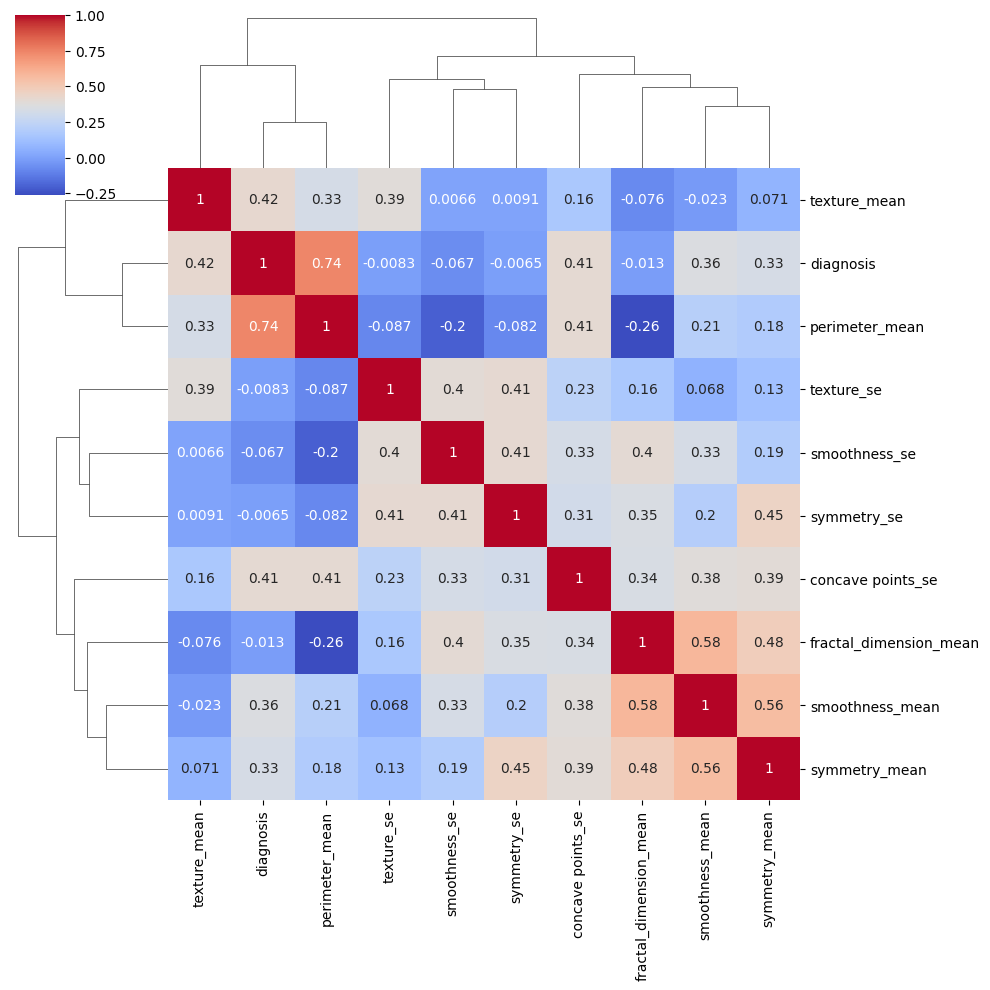

In [19]:
df_personal = df[[#"id",
"diagnosis",
#"radius_mean",
#"area_mean",
"perimeter_mean",
"texture_mean",
"smoothness_mean",
"symmetry_mean",
"fractal_dimension_mean",
"texture_se",
"smoothness_se",
"concave points_se",
"symmetry_se"
]]

sns.clustermap(df_personal.replace({"B":0, "M":1}).corr(), cmap = 'coolwarm', annot = True)

In [9]:
sns.pairplot(data = df_lecture, hue = 'diagnosis')

/Users/victornneji/ga_python/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [10]:
df_lecture["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
####Model with Logistic Regression
from sklearn.model_selection import train_test_split
X = df_lecture.drop("diagnosis", axis = 1)
y = df_lecture['diagnosis'].replace(to_replace = ['B', 'M'], value = [0,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter = 1000)

logr.fit(X_train, y_train)

pred = logr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

[[101   7]
 [  4  59]]


In [12]:
####Model with SVM
from sklearn.model_selection import train_test_split
X = df_lecture.drop("diagnosis", axis = 1)
y = df_lecture['diagnosis'].replace(to_replace = ['B', 'M'], value = [0,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.svm import SVC
svm_m=SVC()

svm_m.fit(X_train, y_train)

pred = svm_m.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       108
           1       1.00      0.70      0.82        63

    accuracy                           0.89       171
   macro avg       0.93      0.85      0.87       171
weighted avg       0.91      0.89      0.88       171

[[108   0]
 [ 19  44]]


In [13]:
##Use GridSearchCV to get the best value of C and gamma in the SVC
param_grid = {"C":[0.1,1,10,100,1000],
             "gamma":[1,0.1,0.01, 0.001, 0.0001]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, verbose = 2)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
pred = grid.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

In [20]:
from sklearn.model_selection import train_test_split
X = df_personal.drop("diagnosis", axis = 1)
y = df_personal['diagnosis'].replace(to_replace = ['B', 'M'], value = [0,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter = 1000)

logr.fit(X_train, y_train)

pred = logr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.93      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

[[104   4]
 [  9  54]]


In [21]:
X = df_personal.drop("diagnosis", axis = 1)
y = df_personal['diagnosis'].replace(to_replace = ['B', 'M'], value = [0,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

svm_m=SVC()

svm_m.fit(X_train, y_train)

pred = svm_m.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       108
           1       1.00      0.81      0.89        63

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171

[[108   0]
 [ 12  51]]


In [22]:
##Use GridSearchCV to get the best value of C and gamma in the SVC
param_grid = {"C":[0.1,1,10,100,1000],
             "gamma":[1,0.1,0.01, 0.001, 0.0001]}
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, verbose = 2)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_estimator_
print(grid.best_score_)
pred_p = grid.predict(X_test)
print(classification_report(y_test, pred_p))
print(confusion_matrix(y_test, pred_p))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ...............................C=1000, gamma=0.0001; total time=   0.0s
[CV] END ...............................C=1000, gamma=0.0001; total time=   0.0s
[CV] END ...............................C=1000, gamma=0.0001; total time=   0.0s
[CV] END ...................

SVC(C=100, gamma=0.0001)


In [17]:
import itertools
combinations = list(itertools.combinations(df.drop(["id", "diagnosis","Unnamed: 32"], axis = 1).columns, 10))
for i in range(0,len(combinations)):
    df_len = df[list(combinations[i])]

KeyboardInterrupt: 